In [1]:
import numpy as np
import torch
import torch.nn as nn
import h5py
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from utils.create_data import sample_check
from utils.tools import random_bbox, mask_image, get_config
from model.networks import Generator

In [2]:
# Parameters
save = True
save_orig = False
img_idx = 0
plt_scale = 0.1
perc=50
rng = np.random.default_rng(0)
exp_path = 'C:/Users/s174370/Desktop/magfield-prediction/checkpoints/boundary_1_256/'
model = 'in_94_l1'
exp_path += model

In [3]:
file = h5py.File('data/bnd_256/magfield_256_large.h5')
field = file['field'][img_idx,:,:,:,1]
v_max = 0.1
# sample_check(field, v_max=0.1)#, filename = 'orig_'+model)

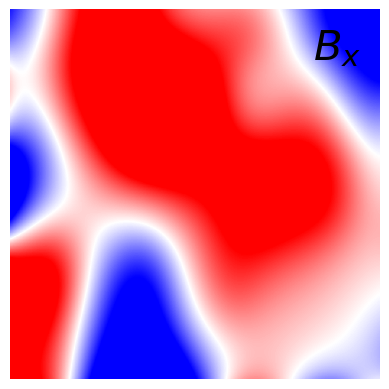

In [4]:
img, ax = plt.subplots()
ax.imshow(field[0,:,:], cmap='bwr',norm=colors.Normalize(vmin=-0.1, vmax=0.1), origin='lower')
# cbar_ax = img.add_axes([0.825, 0.345, 0.015, 0.3])
# img.colorbar(img, cax=cbar_ax)
plt.axis('off')
ax.text(0.95, 0.95, r'$B_x$', transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='top', fontsize = 30)
if save_orig:
        plt.savefig("Bx_field.png", bbox_inches='tight', pad_inches = 0)

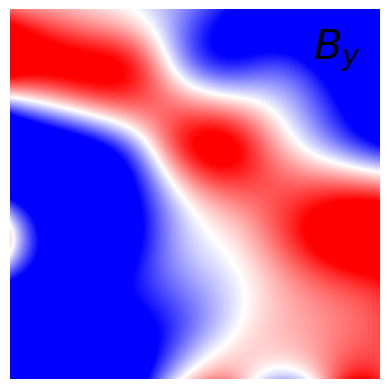

In [5]:
img, ax = plt.subplots()
ax.imshow(field[1,:,:], cmap='bwr',norm=colors.Normalize(vmin=-0.1, vmax=0.1), origin='lower')
# cbar_ax = img.add_axes([0.825, 0.345, 0.015, 0.3])
# img.colorbar(img, cax=cbar_ax)
plt.axis('off')
ax.text(0.95, 0.95, r'$B_y$', transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='top', fontsize = 30)
if save_orig:
        plt.savefig("By_field.png", bbox_inches='tight', pad_inches = 0)

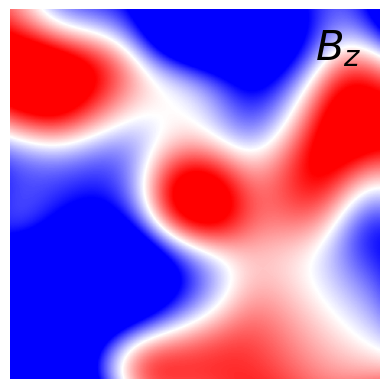

In [6]:
img, ax = plt.subplots()
ax.imshow(field[2,:,:], cmap='bwr',norm=colors.Normalize(vmin=-0.1, vmax=0.1), origin='lower')
# cbar_ax = img.add_axes([0.825, 0.345, 0.015, 0.3])
# img.colorbar(img, cax=cbar_ax)
plt.axis('off')
ax.text(0.95, 0.95, r'$B_z$', transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='top', fontsize = 30)
if save_orig:
        plt.savefig("Bz_field.png", bbox_inches='tight', pad_inches = 0)

In [7]:
config = get_config(r'C:\Users\s174370\magfield-prediction\checkpoints\boundary_1_256\in_94_l1\config.yaml')
bbox_list = [[(75, 10, 94, 94)] for _ in range(config['batch_size'])]
bboxes = torch.tensor(bbox_list, dtype=torch.int64)
x, mask, orig = mask_image(np.array([field]), bboxes, config, bnd=config['boundary'], perc = perc)

# sample_check(orig[0], v_max=plt_scale, filename = 'orig_box_'+model)

In [8]:
last_model_name = r'C:\Users\s174370\magfield-prediction\checkpoints\boundary_1_256\in_94_l1\gen_00600000.pt'
netG = Generator(config['netG'], config['coarse_G'], True, [0])
netG.load_state_dict(torch.load(last_model_name))
netG = nn.parallel.DataParallel(netG, device_ids=[0])
corrupt_t = torch.from_numpy(x[0].astype('float32')).cuda().unsqueeze(0)
mask_t = torch.from_numpy(mask[0].astype('float32')).cuda().unsqueeze(0)

# Inference
_, out, _ = netG(corrupt_t, mask_t)

out_np = out.squeeze(0).cpu().data.numpy()

print(out_np.shape)

(3, 96, 96)


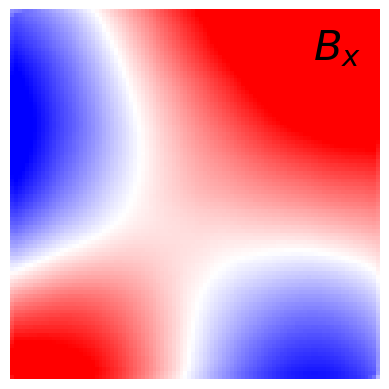

In [9]:
img, ax = plt.subplots()
ax.imshow(out_np[0,:,:], cmap='bwr',norm=colors.Normalize(vmin=-0.1, vmax=0.1), origin='lower')
plt.axis('off')
ax.text(0.95, 0.95, r'$B_x$', transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='top', fontsize = 30)
if save:
        plt.savefig("Bx_result_"+str(perc)+".png", bbox_inches='tight', pad_inches = 0)

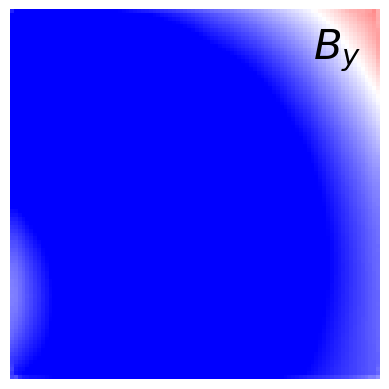

In [10]:
img, ax = plt.subplots()
ax.imshow(out_np[1,:,:], cmap='bwr',norm=colors.Normalize(vmin=-0.1, vmax=0.1), origin='lower')
plt.axis('off')
ax.text(0.95, 0.95, r'$B_y$', transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='top', fontsize = 30)
if save:
        plt.savefig("By_result_"+str(perc)+".png", bbox_inches='tight', pad_inches = 0)

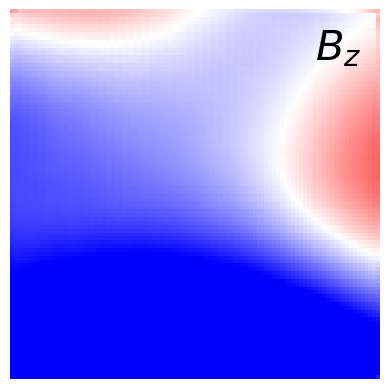

In [11]:
img, ax = plt.subplots()
ax.imshow(out_np[2,:,:], cmap='bwr',norm=colors.Normalize(vmin=-0.1, vmax=0.1), origin='lower')
plt.axis('off')
ax.text(0.95, 0.95, r'$B_z$', transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='top', fontsize = 30)
if save:
        plt.savefig("Bz_result_"+str(perc)+".png", bbox_inches='tight', pad_inches = 0)

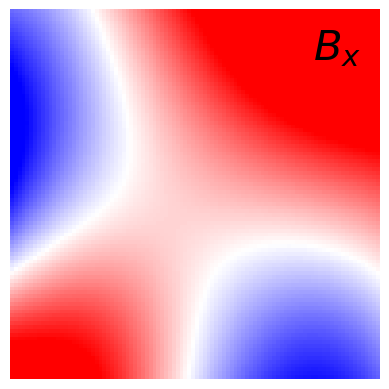

In [12]:
img, ax = plt.subplots()
ax.imshow(orig[0][0], cmap='bwr',norm=colors.Normalize(vmin=-0.1, vmax=0.1), origin='lower')
plt.axis('off')
ax.text(0.95, 0.95, r'$B_x$', transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='top', fontsize = 30)
if save_orig:
        plt.savefig("Bx_bbox_"+str(perc)+".png", bbox_inches='tight', pad_inches = 0)

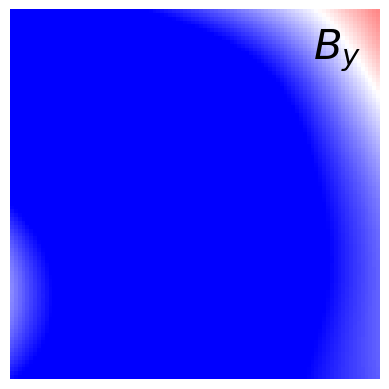

In [13]:
img, ax = plt.subplots()
ax.imshow(orig[0][1], cmap='bwr',norm=colors.Normalize(vmin=-0.1, vmax=0.1), origin='lower')
plt.axis('off')
ax.text(0.95, 0.95, r'$B_y$', transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='top', fontsize = 30)
if save_orig:
        plt.savefig("By_bbox_"+str(perc)+".png", bbox_inches='tight', pad_inches = 0)

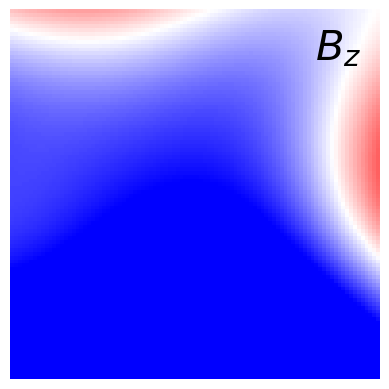

In [14]:
img, ax = plt.subplots()
ax.imshow(orig[0][2], cmap='bwr',norm=colors.Normalize(vmin=-0.1, vmax=0.1), origin='lower')
plt.axis('off')
ax.text(0.95, 0.95, r'$B_z$', transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='top', fontsize = 30)
if save_orig:
        plt.savefig("Bz_bbox.png", bbox_inches='tight', pad_inches = 0)

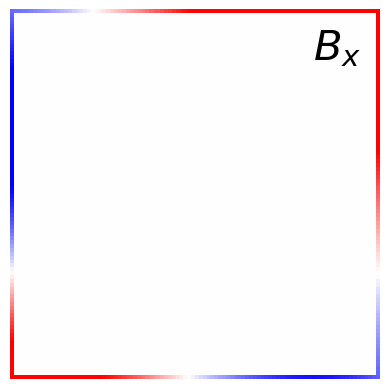

In [15]:
img, ax = plt.subplots()
ax.imshow(x[0][0], cmap='bwr',norm=colors.Normalize(vmin=-0.1, vmax=0.1), origin='lower')
plt.axis('off')
ax.text(0.95, 0.95, r'$B_x$', transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='top', fontsize = 30)
if save:
        plt.savefig("Bx_mask_"+str(perc)+".png", bbox_inches='tight', pad_inches = 0)

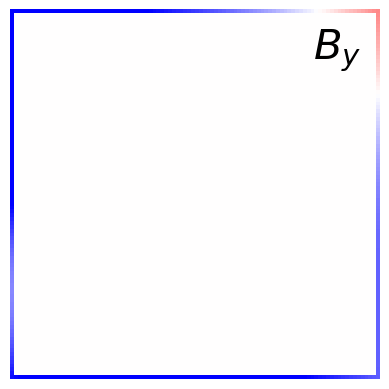

In [16]:
img, ax = plt.subplots()
ax.imshow(x[0][1], cmap='bwr',norm=colors.Normalize(vmin=-0.1, vmax=0.1), origin='lower')
plt.axis('off')
ax.text(0.95, 0.95, r'$B_y$', transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='top', fontsize = 30)
if save:
        plt.savefig("By_mask_"+str(perc)+".png", bbox_inches='tight', pad_inches = 0)

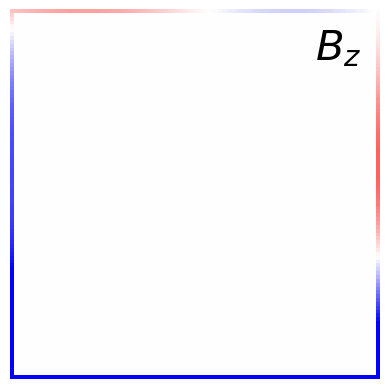

In [17]:
img, ax = plt.subplots()
ax.imshow(x[0][2], cmap='bwr',norm=colors.Normalize(vmin=-0.1, vmax=0.1), origin='lower')
plt.axis('off')
ax.text(0.95, 0.95, r'$B_z$', transform=ax.transAxes,
        horizontalalignment='right', verticalalignment='top', fontsize = 30)
if save:
        plt.savefig("Bz_mask_"+str(perc)+".png", bbox_inches='tight', pad_inches = 0)